In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'openssl'



In [23]:
# Install the 'umap-learn' package from CRAN if it's not already installed
if (!requireNamespace("umap", quietly = TRUE)) {
  install.packages("umap-learn")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘umap-learn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [26]:
install.packages("umap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘RcppEigen’, ‘reticulate’, ‘RSpectra’




In [8]:
# Install R.utils package
install.packages("R.utils") # This line installs the missing R.utils package.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’




In [9]:
BiocManager::install("GEOquery")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'GEOquery'

also installing the dependencies ‘statmod’, ‘XML’, ‘limma’, ‘rentrez’


Old packages: 'openssl'



In [27]:
# Version info: R 4.2.2, Biobase 2.58.0, GEOquery 2.66.0, limma 3.54.0
################################################################
#   Differential expression analysis with DESeq2
library(DESeq2)
library(GEOquery)
library(umap)

In [11]:
# load counts table from GEO
urld <- "https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts"
path <- paste(urld, "acc=GSE165870", "file=GSE165870_raw_counts_GRCh38.p13_NCBI.tsv.gz", sep="&");
tbl <- as.matrix(data.table::fread(path, header=T, colClasses="integer"), rownames="GeneID")

In [12]:
# load gene annotations
apath <- paste(urld, "type=rnaseq_counts", "file=Human.GRCh38.p13.annot.tsv.gz", sep="&")
annot <- data.table::fread(apath, header=T, quote="", stringsAsFactors=F, data.table=F)
rownames(annot) <- annot$GeneID

In [13]:
# sample selection
gsms <- "01111"
sml <- strsplit(gsms, split="")[[1]]

In [14]:
# group membership for samples
gs <- factor(sml)
groups <- make.names(c("Control","positive"))
levels(gs) <- groups
sample_info <- data.frame(Group = gs, row.names = colnames(tbl))

In [15]:
# pre-filter low count genes
# keep genes with at least N counts > 10, where N = size of smallest group
keep <- rowSums( tbl >= 10 ) >= min(table(gs))
tbl <- tbl[keep, ]

ds <- DESeqDataSetFromMatrix(countData=tbl, colData=sample_info, design= ~Group)

ds <- DESeq(ds, test="Wald", sfType="poscount")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



"GeneID"	"padj"	"pvalue"	"lfcSE"	"stat"	"log2FoldChange"	"baseMean"	"Symbol"	"Description"
3042	4.71507018142848e-16	2.54607170010717e-20	1.14148046842106	-9.23653567320076	-10.543325066833	4182.94577679328	"HBM"	"hemoglobin subunit mu"
3040	1.40015844893604e-13	1.51213180942388e-17	1.41961523860104	-8.52621569982546	-12.1039457350716	1064502.88396422	"HBA2"	"hemoglobin subunit alpha 2"
3039	3.03018760856865e-12	4.90877629769747e-16	1.42306191222421	-8.11373342694607	-11.5463450058274	898106.427718095	"HBA1"	"hemoglobin subunit alpha 1"
973	4.36610972394581e-11	9.43055180937591e-15	0.809554026439513	-7.74670794749429	-6.27137861054498	1303.11917504716	"CD79A"	"CD79a molecule"
3047	7.22781925813872e-11	1.95146046172545e-14	1.35294059653228	-7.65378658076311	-10.3551185823084	87586.3288296033	"HBG1"	"hemoglobin subunit gamma 1"
1879	1.09913741158451e-10	3.56111262460558e-14	0.79369546050457	-7.57609493659004	-6.01311215952318	3789.22498594906	"EBF1"	"EBF transcription factor 1"
6521	2.10

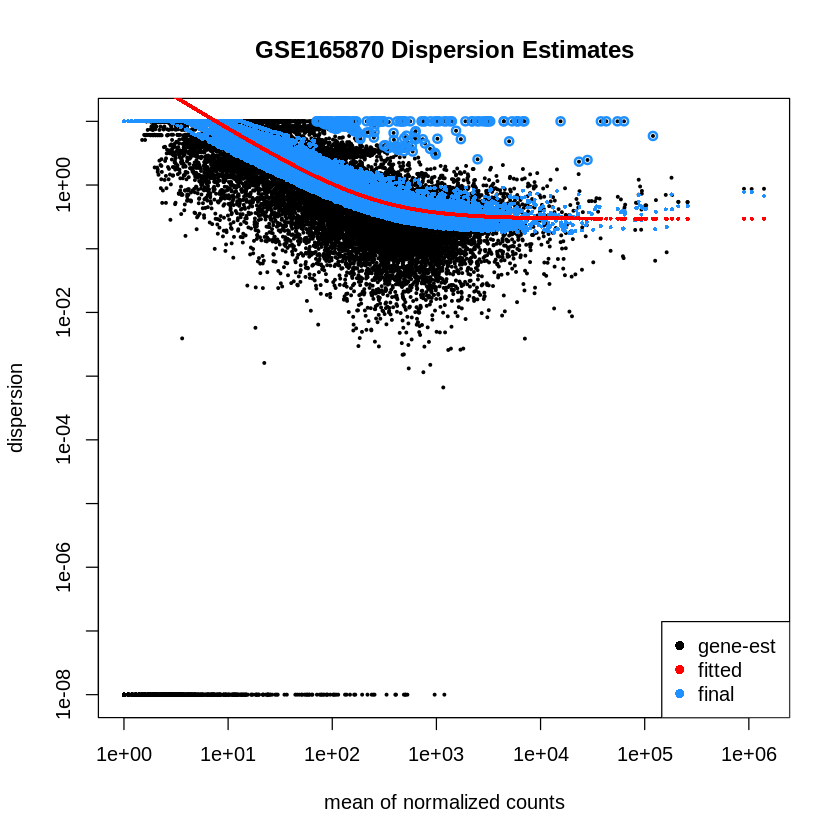

In [16]:
# extract results for top genes table
r <- results (ds, contrast=c("Group", groups[1], groups[2]), alpha=0.05, pAdjustMethod ="fdr")

tT <- r[order(r$padj)[1:250],]
tT <- merge(as.data.frame(tT), annot, by=0, sort=F)

tT <- subset(tT, select=c("GeneID","padj","pvalue","lfcSE","stat","log2FoldChange","baseMean","Symbol","Description"))
write.table(tT, file=stdout(), row.names=F, sep="\t")

plotDispEsts(ds, main="GSE165870 Dispersion Estimates")

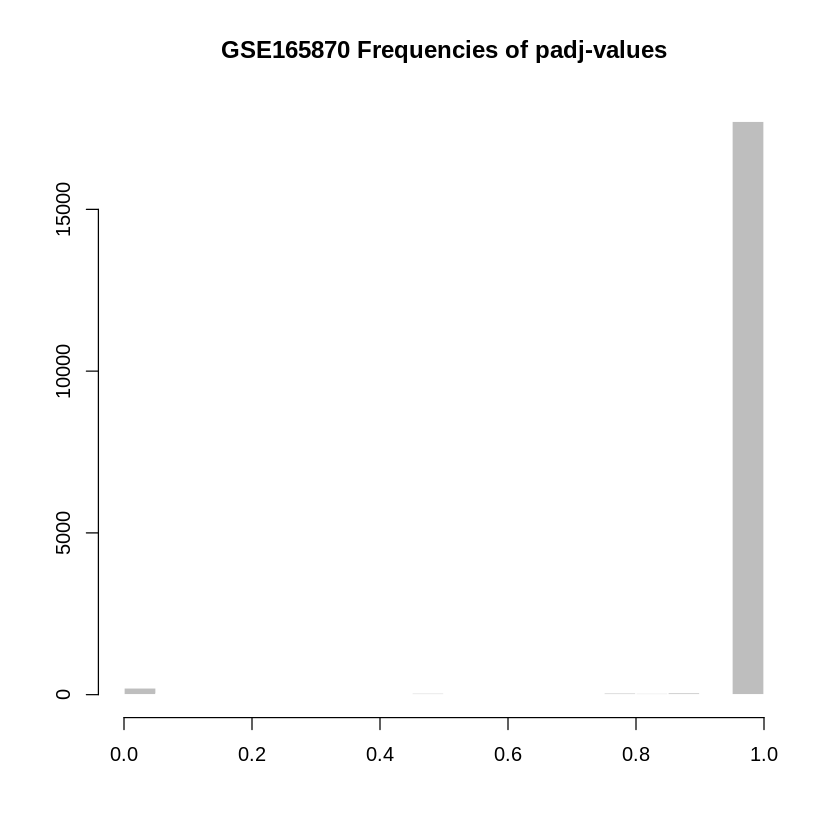

In [17]:
# create histogram plot of p-values
hist(r$padj, breaks=seq(0, 1, length = 21), col = "grey", border = "white",
         xlab = "", ylab = "", main = "GSE165870 Frequencies of padj-values")

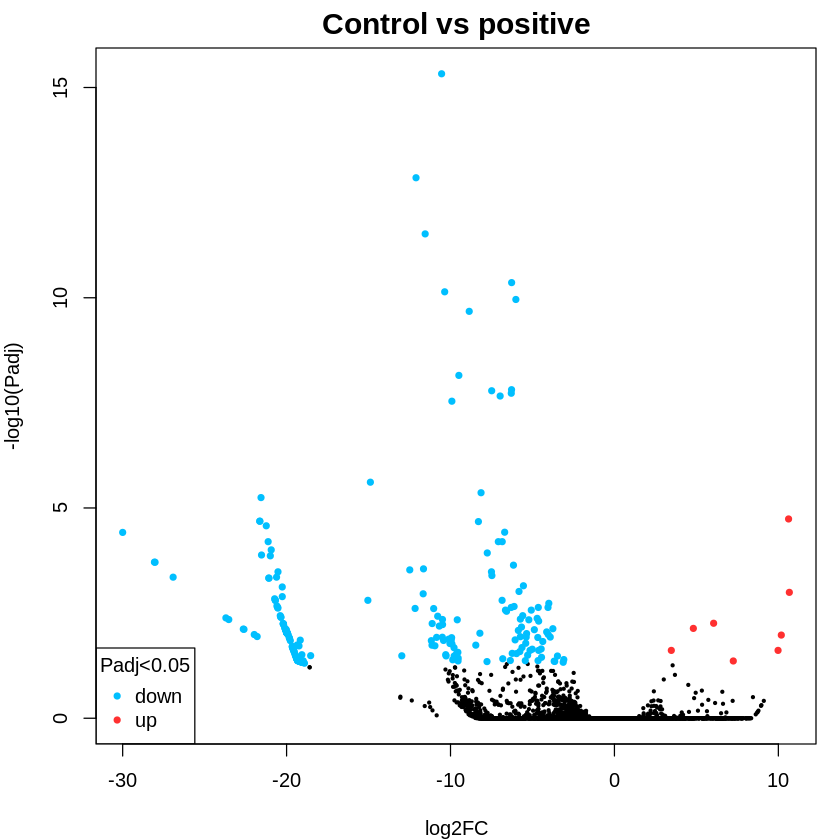

In [18]:
# volcano plot
old.pal <- palette(c("#00BFFF", "#FF3030")) # low-hi colors
par(mar=c(4,4,2,1), cex.main=1.5)
plot(r$log2FoldChange, -log10(r$padj), main=paste(groups[1], "vs", groups[2]),
     xlab="log2FC", ylab="-log10(Padj)", pch=20, cex=0.5)
with(subset(r, padj<0.05 & abs(log2FoldChange) >= 0),
     points(log2FoldChange, -log10(padj), pch=20, col=(sign(log2FoldChange) + 3)/2, cex=1))
legend("bottomleft", title=paste("Padj<", 0.05, sep=""), legend=c("down", "up"), pch=20,col=1:2)

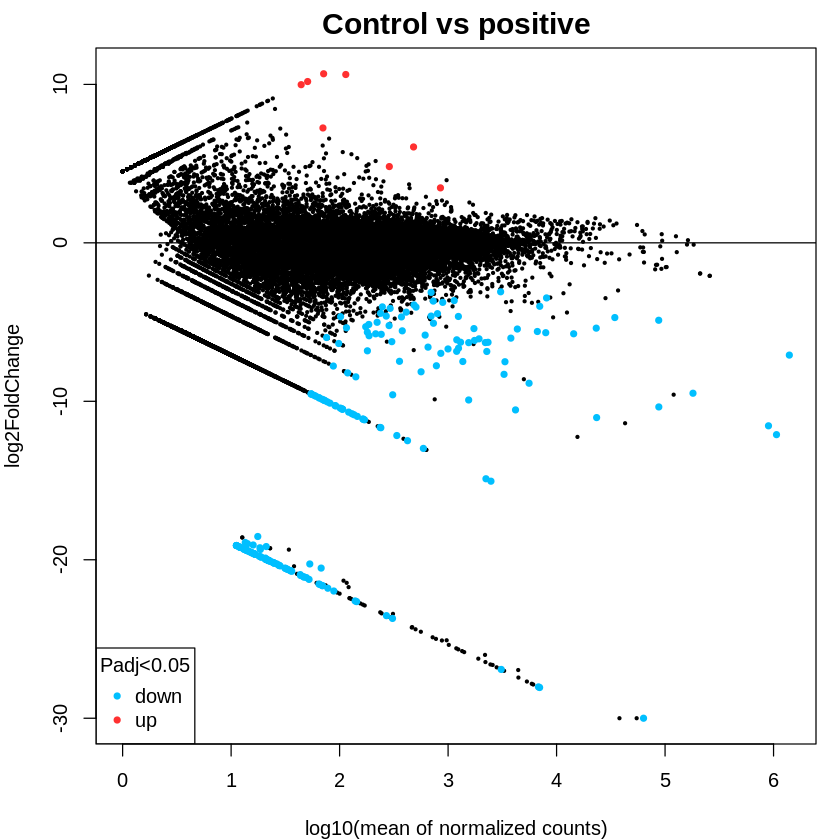

In [19]:
# MD plot
par(mar=c(4,4,2,1), cex.main=1.5)
plot(log10(r$baseMean), r$log2FoldChange, main=paste(groups[1], "vs", groups[2]),
     xlab="log10(mean of normalized counts)", ylab="log2FoldChange", pch=20, cex=0.5)
with(subset(r, padj<0.05 & abs(log2FoldChange) >= 0),
     points(log10(baseMean), log2FoldChange, pch=20, col=(sign(log2FoldChange) + 3)/2, cex=1))
legend("bottomleft", title=paste("Padj<", 0.05, sep=""), legend=c("down", "up"), pch=20,col=1:2)
abline(h=0)
palette(old.pal) # restore palette

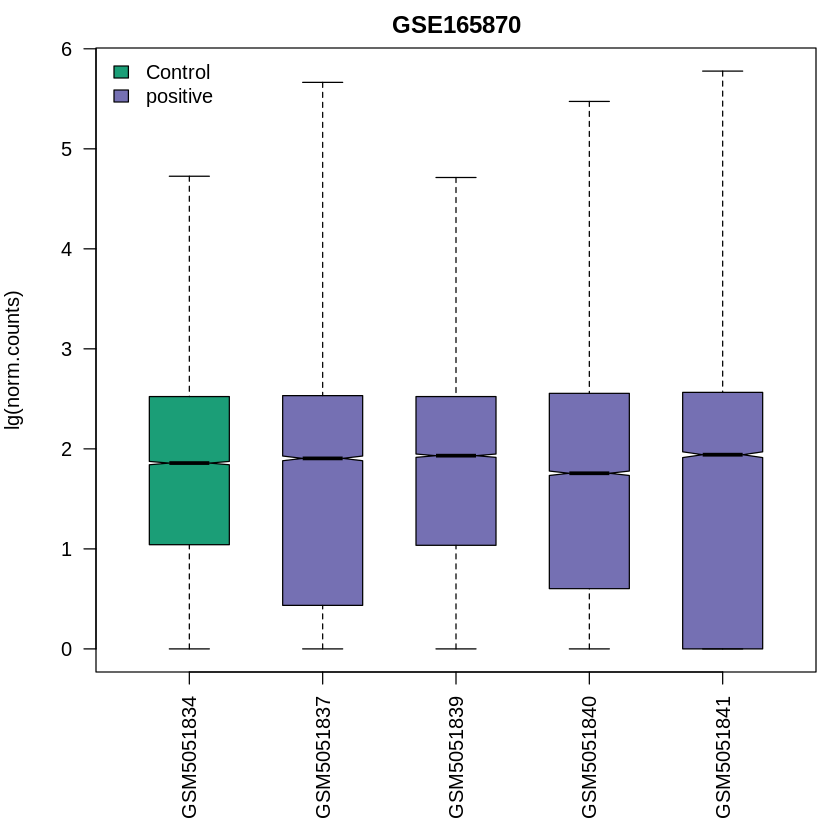

In [20]:
################################################################
#   General expression data visualization
dat <- log10(counts(ds, normalized = T) + 1) # extract normalized counts

# box-and-whisker plot
lbl <- "log10(raw counts + 1)"
ord <- order(gs)  # order samples by group
palette(c("#1B9E77", "#7570B3", "#E7298A", "#E6AB02", "#D95F02",
          "#66A61E", "#A6761D", "#B32424", "#B324B3", "#666666"))
par(mar=c(7,4,2,1))
boxplot(dat[,ord], boxwex=0.6, notch=T, main="GSE165870", ylab="lg(norm.counts)", outline=F, las=2, col=gs[ord])
legend("topleft", groups, fill=palette(), bty="n")

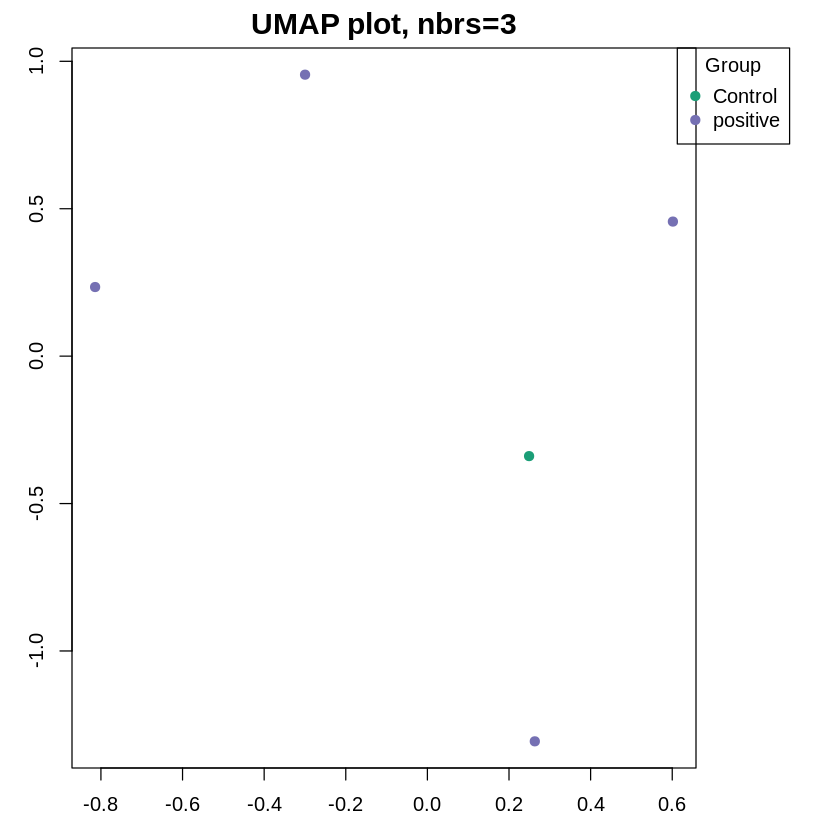

In [28]:
# UMAP plot (multi-dimensional scaling)
library(umap)
dat <- dat[!duplicated(dat), ] # first remove duplicates
par(mar=c(3,3,2,6), xpd=TRUE, cex.main=1.5)
ump <- umap(t(dat), n_neighbors = 3, random_state = 123)
plot(ump$layout, main="UMAP plot, nbrs=3", xlab="", ylab="", col=gs, pch=20, cex=1.5)
legend("topright", inset=c(-0.15,0), legend=groups, pch=20,
       col=1:length(groups), title="Group", pt.cex=1.5)